11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8559 - loss: 0.4961 - val_accuracy: 0.9567 - val_loss: 0.1375
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9545 - loss: 0.1546 - val_accuracy: 0.9668 - val_loss: 0.1070
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9665 - loss: 0.1097 - val_accuracy: 0.9719 - val_loss: 0.0919
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9725 - loss: 0.0870 - val_accuracy: 0.9736 - val_loss: 0.0894
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9764 - loss: 0.0760 - val_accuracy: 0.9771 - val_loss: 0.0759
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9799 - loss: 0.0645 - val_accuracy: 0.9785 - val_loss: 0.0725
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9820 - loss: 0.0550 - val_accuracy: 0.9787 - val_loss: 0.0735
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━


Test accuracy: 0.98


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


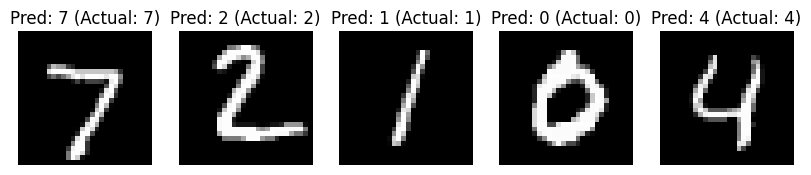

Final Model Accuracy: 97.99%


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Load MNIST dataset (Using built-in TensorFlow dataset instead of Kaggle)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')

# Save the model
model.save('mnist_digit_recognition.h5')
files.download('mnist_digit_recognition.h5')

# Display some sample predictions
predictions = model.predict(x_test[:5])
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Pred: {np.argmax(predictions[i])} (Actual: {y_test[i]})')
    plt.axis('off')
plt.show()

# Print final accuracy
print(f'Final Model Accuracy: {test_acc * 100:.2f}%')
